In [1]:
import time
start_time=time.time()

In [2]:
from pathlib import Path

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import interpolate
import pickle
import json

import strucfunc
from strucfunc import sosflog
import bfunc

In [3]:
reg = 'Car'
line = 'CarC'

In [4]:
text_file_0 = open("path-data.txt", "r")
path_data = text_file_0.read()

In [5]:
datapath_data = Path(path_data).expanduser()

In [6]:
name = 'FLA-Car-H'

In [7]:
data_in = json.load(open(str(datapath_data) + '/' + name + "-l.json"))

In [8]:
data=pd.DataFrame(data_in[name])

In [9]:
data.columns=['X','Y','RV','I','Sig']

In [10]:
data.RV.var()

17.88722171455478

In [11]:
sig = data.RV.std()
sig2 = data.RV.var()

In [12]:
box_size = np.sqrt((data.X.max()-data.X.min())*(data.Y.max()-data.Y.min()))*data_in['pc']*3600
box_size

19.663599098314407

In [13]:
table = sosflog(data,0.05,3600)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [14]:
table

s                                                                 \
       count         mean        std          min          25%          50%   
ils                                                                           
0      164.0     7.809677   2.453506     0.211978     6.590524     8.132011   
1       52.0    11.881121   0.426700    11.244926    11.418485    11.838152   
2       50.0    13.209352   0.414634    12.625015    12.858117    13.138357   
3       79.0    15.086002   0.507166    14.170388    14.680454    15.090333   
4       82.0    16.683759   0.534732    15.874459    16.116986    16.665542   
5      106.0    18.870563   0.637880    17.794311    18.285605    18.865308   
6      178.0    21.355721   0.647996    20.012301    20.919190    21.303552   
7      179.0    23.814193   0.867839    22.389750    22.988909    23.827790   
8      291.0    26.670143   0.899324    25.128815    25.729388    26.724387   
9      380.0    30.016551   1.007698    28.213799    29.176864    29.967368   
10     401.0    33.679462   1.104612    31.637532    32.693596    33.638661   
11     465.0    37.627829   1.210409    35.502540    36.571250    37.697302   
12     644.0    42.173247   1.404139    39.813962    40.911899    42.125821   
13     780.0    47.523541   1.573856    44.681429    46.114676    47.590004   
14    1000.0    53.345209   1.735420    50.130007    51.810794    53.430731   
15    1233.0    59.725447   1.929031    56.238859    58.232554    59.910844   
16    1480.0    67.204394   2.233275    63.098171    65.269840    67.298201   
17    1917.0    75.048349   2.515952    70.803396    72.782008    75.127646   
18    2232.0    84.368325   2.811975    79.439088    81.960146    84.309901   
19    2837.0    94.701024   3.177368    89.145911    91.876541    94.835030   
20    3507.0   106.250418   3.563703   100.009860   103.122359   106.269190   
21    4189.0   119.319843   3.974148   112.203692   115.987029   119.431776   
22    5243.0   133.597912   4.424441   125.907119   129.760458   133.691914   
23    6619.0   149.983765   5.014054   141.257272   145.583706   149.925925   
24    7888.0   168.212063   5.535866   158.501435   163.470617   168.067107   
25    9549.0   188.794752   6.327709   177.834196   183.214854   188.968314   
26   10821.0   211.636362   7.063971   199.533407   205.400644   211.595388   
27   13106.0   237.700951   7.958881   223.884718   230.829459   237.855443   
28   16191.0   266.645867   8.885366   251.191013   259.013244   266.725184   
29   19254.0   299.210467   9.953374   281.842400   290.510671   299.401418   
30   21698.0   335.782598  11.176215   316.230338   326.135929   335.944910   
31   24655.0   376.575604  12.406741   354.818500   365.898047   376.719615   
32   27277.0   422.332876  13.909942   398.107604   410.329628   422.445121   
33   29165.0   473.435137  15.809566   446.684138   459.579749   472.934064   
34   29338.0   531.402153  17.541614   501.188275   516.370436   531.217393   
35   29274.0   595.838659  19.837650   562.346510   578.475469   595.449155   
36   27842.0   668.140117  22.126768   630.964145   648.898195   667.485627   
37   24903.0   749.349737  24.903883   707.946971   727.668332   748.579429   
38   18839.0   838.962382  27.809085   794.335568   814.407201   837.319232   
39   11564.0   939.267220  30.667721   891.258598   912.633480   936.309037   
40    5677.0  1051.353045  34.698933  1000.018542  1021.360134  1046.179493   
41    2617.0  1179.720256  37.920165  1122.040200  1146.477742  1174.874130   
42     917.0  1315.175640  39.783514  1258.934675  1280.767417  1309.429235   
43     130.0  1460.845422  43.864659  1413.460840  1426.409371  1444.962132   
44       9.0  1644.725897  41.476523  1588.467518  1602.436084  1652.707750   

                                   dV2                                      \
             75%          max    count       mean        std           min   
ils                                                           

In [15]:
s = 0.5 * (table[('s', 'min')] + table[('s', 'max')])*data_in['pc']
e_s = 0.5 * (table[('s', 'max')] - table[('s', 'min')])*data_in['pc']
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')] / np.sqrt(ng)

In [16]:
r0 = np.interp(sig2, b2[1:35], s[1:35])
r0

0.5150140496435922

In [17]:
r1 = np.interp(sig, b2[1:35], s[1:35])
r1

0.12409536779701669

In [18]:
r2 = np.interp(2*sig2, b2[1:35], s[1:35])
r2

1.5947772039169978

(17.88722171455478, 0.5150140496435922, 0.9, 0.009293878266869804, 2.0)

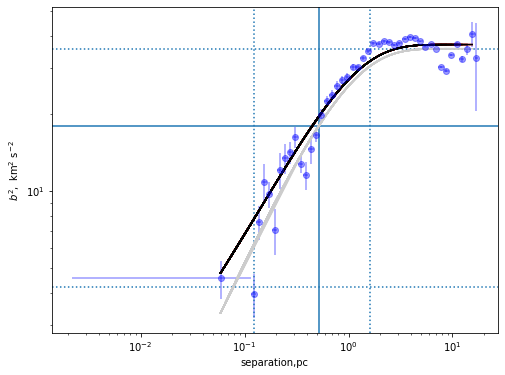

In [19]:
m = 0.9
noise = 2.0
s0 = data_in['s0']
rgrid = np.linspace(s[0], s[:-1])

fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")

ax.axhline(sig2, ls='-')
ax.axvline(r0, ls='-')

ax.axhline(2*sig2, ls=':')
ax.axvline(r2, ls=':')

ax.axhline(sig, ls=':')
ax.axvline(r1, ls=':')

ax.plot(rgrid, bfunc.bfunc00s(rgrid, r0, sig2, m), color="0.8")
ax.plot(rgrid, bfunc.bfunc03s(rgrid, r0, sig2, m, s0, noise), color="red")
ax.plot(rgrid, bfunc.bfunc04s(rgrid, r0, sig2, m, s0, noise, box_size), color="black")


ax.set(xscale='log', yscale='log', 
       xlabel='separation,pc',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

sig2, r0, m, s0, noise

In [20]:
table

s                                                                 \
       count         mean        std          min          25%          50%   
ils                                                                           
0      164.0     7.809677   2.453506     0.211978     6.590524     8.132011   
1       52.0    11.881121   0.426700    11.244926    11.418485    11.838152   
2       50.0    13.209352   0.414634    12.625015    12.858117    13.138357   
3       79.0    15.086002   0.507166    14.170388    14.680454    15.090333   
4       82.0    16.683759   0.534732    15.874459    16.116986    16.665542   
5      106.0    18.870563   0.637880    17.794311    18.285605    18.865308   
6      178.0    21.355721   0.647996    20.012301    20.919190    21.303552   
7      179.0    23.814193   0.867839    22.389750    22.988909    23.827790   
8      291.0    26.670143   0.899324    25.128815    25.729388    26.724387   
9      380.0    30.016551   1.007698    28.213799    29.176864    29.967368   
10     401.0    33.679462   1.104612    31.637532    32.693596    33.638661   
11     465.0    37.627829   1.210409    35.502540    36.571250    37.697302   
12     644.0    42.173247   1.404139    39.813962    40.911899    42.125821   
13     780.0    47.523541   1.573856    44.681429    46.114676    47.590004   
14    1000.0    53.345209   1.735420    50.130007    51.810794    53.430731   
15    1233.0    59.725447   1.929031    56.238859    58.232554    59.910844   
16    1480.0    67.204394   2.233275    63.098171    65.269840    67.298201   
17    1917.0    75.048349   2.515952    70.803396    72.782008    75.127646   
18    2232.0    84.368325   2.811975    79.439088    81.960146    84.309901   
19    2837.0    94.701024   3.177368    89.145911    91.876541    94.835030   
20    3507.0   106.250418   3.563703   100.009860   103.122359   106.269190   
21    4189.0   119.319843   3.974148   112.203692   115.987029   119.431776   
22    5243.0   133.597912   4.424441   125.907119   129.760458   133.691914   
23    6619.0   149.983765   5.014054   141.257272   145.583706   149.925925   
24    7888.0   168.212063   5.535866   158.501435   163.470617   168.067107   
25    9549.0   188.794752   6.327709   177.834196   183.214854   188.968314   
26   10821.0   211.636362   7.063971   199.533407   205.400644   211.595388   
27   13106.0   237.700951   7.958881   223.884718   230.829459   237.855443   
28   16191.0   266.645867   8.885366   251.191013   259.013244   266.725184   
29   19254.0   299.210467   9.953374   281.842400   290.510671   299.401418   
30   21698.0   335.782598  11.176215   316.230338   326.135929   335.944910   
31   24655.0   376.575604  12.406741   354.818500   365.898047   376.719615   
32   27277.0   422.332876  13.909942   398.107604   410.329628   422.445121   
33   29165.0   473.435137  15.809566   446.684138   459.579749   472.934064   
34   29338.0   531.402153  17.541614   501.188275   516.370436   531.217393   
35   29274.0   595.838659  19.837650   562.346510   578.475469   595.449155   
36   27842.0   668.140117  22.126768   630.964145   648.898195   667.485627   
37   24903.0   749.349737  24.903883   707.946971   727.668332   748.579429   
38   18839.0   838.962382  27.809085   794.335568   814.407201   837.319232   
39   11564.0   939.267220  30.667721   891.258598   912.633480   936.309037   
40    5677.0  1051.353045  34.698933  1000.018542  1021.360134  1046.179493   
41    2617.0  1179.720256  37.920165  1122.040200  1146.477742  1174.874130   
42     917.0  1315.175640  39.783514  1258.934675  1280.767417  1309.429235   
43     130.0  1460.845422  43.864659  1413.460840  1426.409371  1444.962132   
44       9.0  1644.725897  41.476523  1588.467518  1602.436084  1652.707750   

                                   dV2                                      \
             75%          max    count       mean        std           min   
ils                                                           

In [21]:
results = {
    'sig2' : sig2,
        'r0' : r0,
        'r1' : r1,
        'r2' : r2,
          } 

In [22]:
data_export = {   
        's' : np.array(s),
        'b2' : np.array(b2),
        'pc' : data_in['pc'],
#        'pix' : data_in['pix'],
        's0' : data_in['s0'],
        'box_size': box_size,
         'results':results,
         'SF' : np.array(table),
        'VF' : data_in,
}

In [23]:
class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

In [24]:
jsonfilename ="sf-" + name +".json"
with open(jsonfilename, "w") as f:
    json.dump(data_export, fp=f, indent=3, cls=MyEncoder)

In [25]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 6.688183069229126 seconds ---


In [26]:
!jupyter nbconvert --to script --no-prompt sf-FLA-Car-H.ipynb

[NbConvertApp] Converting notebook sf-FLA-Car-H.ipynb to script
[NbConvertApp] Writing 2961 bytes to sf-FLA-Car-H.py
